In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf

In [2]:
df = pd.read_csv(r'C:\Users\huang\stout interview\casestudy.csv')
df

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...,...
685922,685922,qzqttwiftu@gmail.com,184.58,2017
685923,685923,pjodiifjop@gmail.com,133.03,2017
685924,685924,appaplmgko@gmail.com,200.98,2017
685925,685925,wvkpmwsgck@gmail.com,235.35,2017


## Total revenue for the current year

<function matplotlib.pyplot.show(close=None, block=None)>

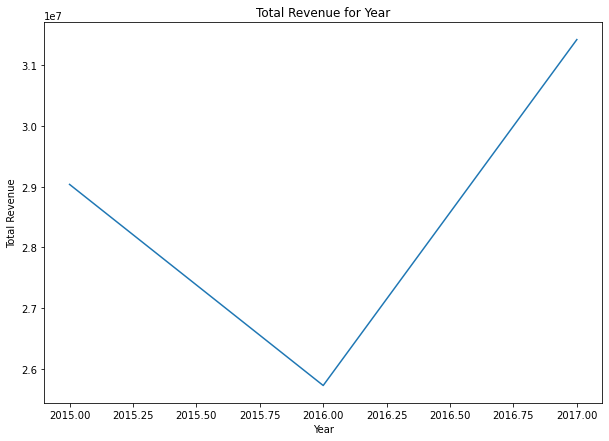

In [31]:
q = """
        select year, sum(net_revenue) as total_revenue
        from df
        group by year
"""

total_rev = sqldf(q, locals())
total_rev

plt.rcParams['figure.figsize'] = [10, 7]

plt.plot(total_rev.year, total_rev.total_revenue)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for Year')
plt.show

## New Customer Revenues

<function matplotlib.pyplot.show(close=None, block=None)>

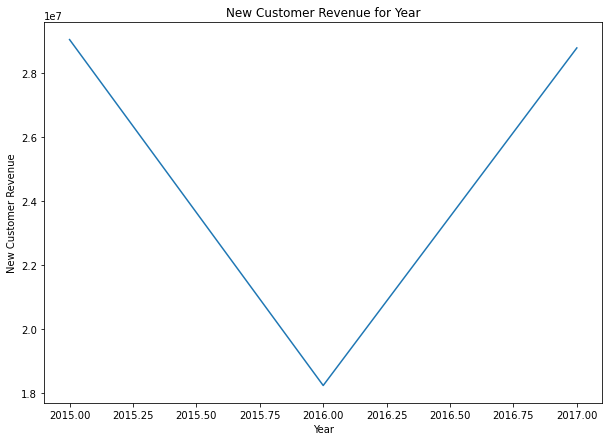

In [32]:
q = """
with new_cust as
(
    with a as 
    (
        select distinct customer_email, year     --cur_cust_email
        from df
    ),
    b as (
        with years as      --prev_cust_email
        (
        select year
        from df
        group by year
        )
        select distinct customer_email, years.year
        from df, years
        where df.year=years.year-1
        order by years.year
    )
    select *
    from a
    EXCEPT
    select *
    from b
)
select df.year, sum(net_revenue) as new_rev
from df, new_cust
where df.year = new_cust.year and df.customer_email = new_cust.customer_email 
group by df.year
        
"""


new_cust_rev = sqldf(q, locals())
new_cust_rev

plt.plot(new_cust_rev.year, new_cust_rev.new_rev)
plt.xlabel('Year')
plt.ylabel('New Customer Revenue')
plt.title('New Customer Revenue for Year')
plt.show

## Existing Customer Growth

<function matplotlib.pyplot.show(close=None, block=None)>

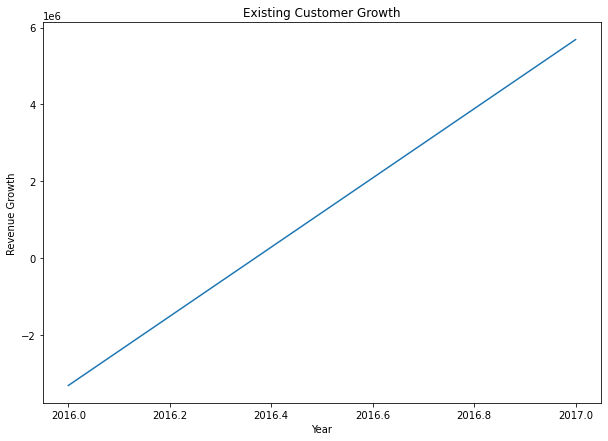

In [33]:
q = """
        with years as
        (
        select year, sum(net_revenue) as cur_rev
        from df
        group by year
        )
        select years.year, years.cur_rev - sum(net_revenue) as existing_cust_growth
        from df, years
        where df.year = years.year-1
        group by years.year

        
        
        
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.existing_cust_growth)
plt.xlabel('Year')
plt.ylabel('Revenue Growth')
plt.title('Existing Customer Growth')
plt.show

## Existing Customer Revenue Current Year

<function matplotlib.pyplot.show(close=None, block=None)>

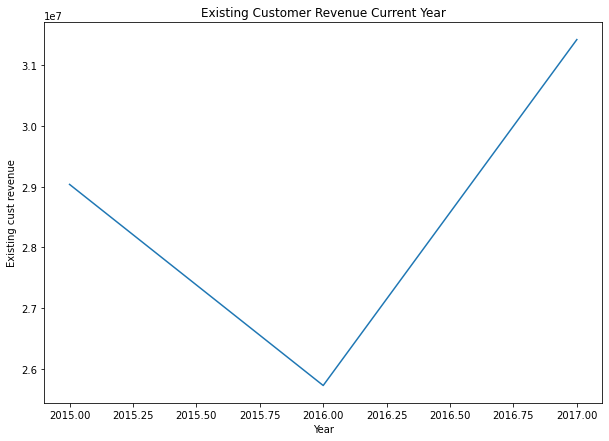

In [34]:
q = """
        select year, sum(net_revenue) as cur_rev
        from df
        group by year
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.cur_rev)
plt.xlabel('Year')
plt.ylabel('Existing cust revenue')
plt.title('Existing Customer Revenue Current Year')
plt.show

## Existing Customer Revenue Prior Year

<function matplotlib.pyplot.show(close=None, block=None)>

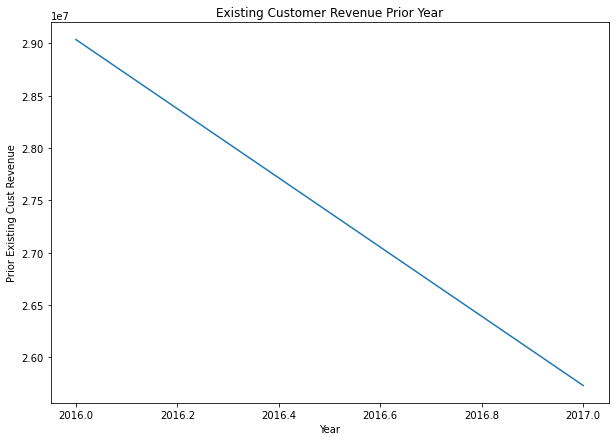

In [36]:
q = """
        with years as
        (
        select year
        from df
        group by year
        )
        select years.year, sum(net_revenue) as prev_rev
        from df, years
        where df.year = years.year-1
        group by years.year
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.prev_rev)
plt.xlabel('Year')
plt.ylabel('Prior Existing Cust Revenue')
plt.title('Existing Customer Revenue Prior Year')
plt.show

## Total Customers Current Year

<function matplotlib.pyplot.show(close=None, block=None)>

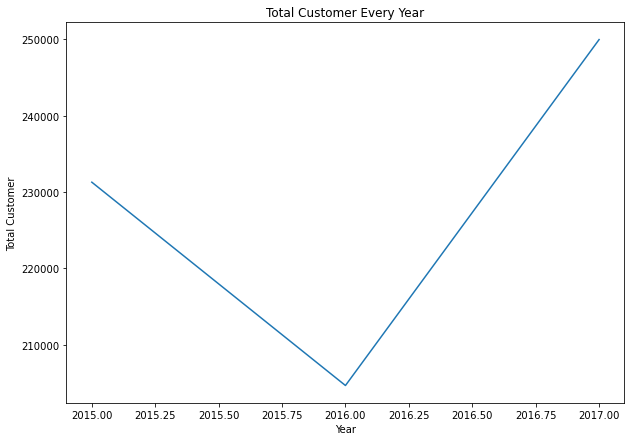

In [37]:
q = """
        select year, count(distinct customer_email) as total_cust
        from df
        group by year
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.total_cust)
plt.xlabel('Year')
plt.ylabel('Total Customer')
plt.title('Total Customer Every Year')
plt.show

## Total Customers Previous Year

<function matplotlib.pyplot.show(close=None, block=None)>

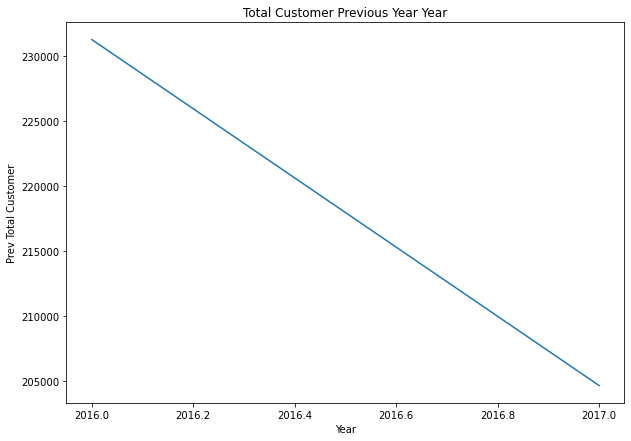

In [38]:
q = """
        with years as
        (
        select year
        from df
        group by year
        )
        select years.year, count(distinct customer_email) as prev_total_cust
        from df, years
        where df.year=years.year-1
        group by years.year
"""
cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.prev_total_cust)
plt.xlabel('Year')
plt.ylabel('Prev Total Customer')
plt.title('Total Customer Previous Year Year')
plt.show

## New Customers

<function matplotlib.pyplot.show(close=None, block=None)>

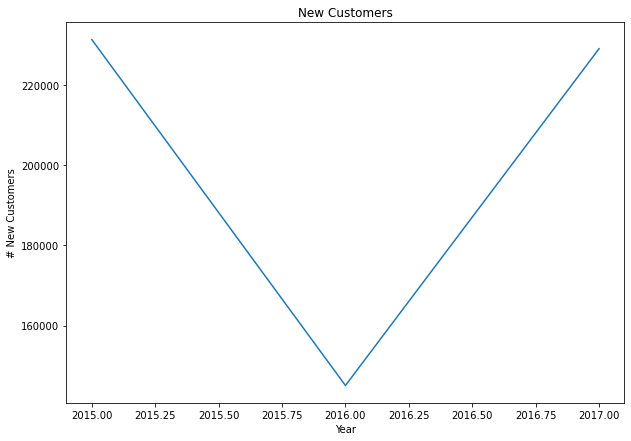

In [40]:
q = """
    with a as 
    (
        select distinct customer_email, year     --cur_cust_email
        from df
    ),
    b as (
        with years as      --prev_cust_email
        (
        select year
        from df
        group by year
        )
        select distinct customer_email, years.year
        from df, years
        where df.year=years.year-1
        order by years.year
    )
    select year, count(distinct customer_email) as new_cust
    from(
    select *
    from a
    EXCEPT
    select *
    from b
    )
    group by year
        
        
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.new_cust)
plt.xlabel('Year')
plt.ylabel('# New Customer')
plt.title('New Customers')
plt.show

## Lost Customers

<function matplotlib.pyplot.show(close=None, block=None)>

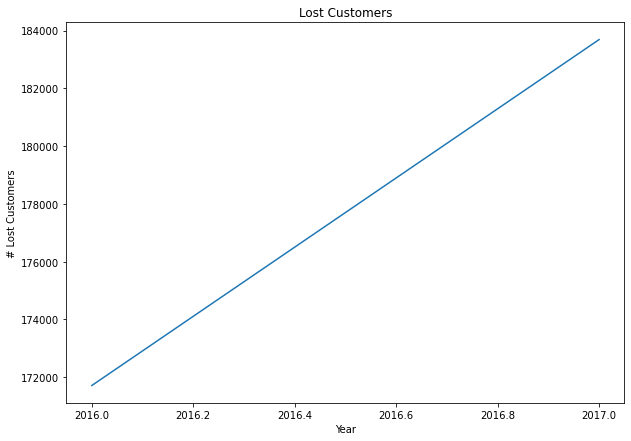

In [41]:
q = """
    with a as 
    (
        select distinct customer_email, year     --cur_cust_email
        from df
    ),
    b as (
        with years as      --prev_cust_email
        (
        select year
        from df
        group by year
        )
        select distinct customer_email, years.year
        from df, years
        where df.year=years.year-1
        order by years.year
    )
    select year, count(distinct customer_email) as lost_cust
    from(
    select *
    from b
    EXCEPT
    select *
    from a
    )
    group by year
        
"""

cust_growth = sqldf(q, locals())
cust_growth

plt.plot(cust_growth.year, cust_growth.lost_cust)
plt.xlabel('Year')
plt.ylabel('# Lost Customers')
plt.title('Lost Customers')
plt.show

## Conclusion
 
The # of lost customers is increasing from 2016-2017. The # of new customers is also increasing 2016-2017. In 2016, the total customer decreased (150000-172000=-22000). In 2017, the total customer increased (230000-184000= 46000). This means that the business is risky. The total customer every year chart shows a better picture then it really is. The company is losing a lot of customers.

The total revenue plot has the same shape as the total customer plot. The revenue is correlated with the # of customers. 

